<a href="https://colab.research.google.com/github/noobylub/Computational-Linguistic/blob/master/Vector%2C_matrix%2C_and_data_frame_operations%3B_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic operations with NumPy

Let's use numpy to generate a matrix of random values -- a very useful thing to do when playing around with statistical code.

Our matrix will be a grade table for a BA. Each of the 50 students takes four modules per year, so 12 modules per programme. Assuming all students passed all modules, the lowest grade will be 40, and by convention grades almost never surpass 85.

In [20]:
import numpy as np

rows = 50
cols = 12

np.random.seed(42)

# Generate a mean for each row, normally distributed with mean 65 and variance
# 10, then clipped between 55 and 75
means = np.random.normal(loc=65, scale=np.sqrt(10), size=rows)
means = np.clip(means, 55, 75)

# Generate a standard deviation for each row, derived from variance between
# 5 and 10
# Standard deviation is sqrt(variance)
# It makes it a uniform distribution. In other words, any value within the given interval is equally likely to be drawn by a uniform distribution.
std_devs = np.sqrt(np.random.uniform(5, 10, rows))

# Initialize an empty matrix to store the results
matrix = np.zeros((rows, cols))

# Generate random numbers for each row
for i in range(rows):
    # Generate normally distributed numbers for the current row
    # The 'size' parameter ensures we get 'cols' number of values
    row_values = np.random.normal(loc=means[i], scale=std_devs[i], size=cols)

    # Clip the values to be between 40 and 85
    clipped_row_values = np.clip(row_values, 40, 85)

    # Store the clipped values in the matrix
    # Take the ith row, and take all the values of the row at index i
    matrix[i, :] = np.round(clipped_row_values, 2)

print("Matrix shape:", matrix.shape)
print("\nFirst 5 rows of the generated matrix:")
print(matrix[:5, :])

Matrix shape: (50, 12)

First 5 rows of the generated matrix:
[[65.31 67.8  66.8  68.88 64.89 65.79 65.63 63.08 67.28 67.19 66.58 66.01]
 [60.31 63.3  63.53 62.15 64.08 65.78 70.22 65.09 65.34 64.34 58.8  64.48]
 [67.19 72.76 66.6  67.75 66.97 64.34 69.7  68.79 68.88 64.94 70.3  63.8 ]
 [71.67 76.72 66.69 68.03 70.13 68.23 64.93 70.03 66.47 71.31 66.92 74.7 ]
 [61.93 63.3  66.68 60.6  64.94 68.15 59.47 64.81 65.03 66.59 60.58 60.33]]


How do we compute the GPA? Let's use vector and matrix operations.

Options:
1. No weighting.
2. The SALC scheme: first-year modules do not count; third year modules contribute twice more than second-year modules.

In [ ]:
matrix

In [28]:
# TODO
# 1.
# same_weigh_vector = np.ones(cols) / cols
# gpa_m = matrix @ same_weigh_vector.reshape(-1,1)
# gpa_m.shape
# At some point we will have to use A @ B or np.dot(A, B)
#
salc_propotions = np.concatenate([
    np.zeros(cols // 3),
    np.ones(cols // 3),
    np.ones(cols // 3) * 2
])
print(salc_propotions[:8])
salc_weights = salc_propotions / np.sum(salc_propotions)

salc_matrix = matrix @ salc_weights.reshape(-1,1)
salc_matrix[:10]


[0. 0. 0. 0. 1. 1. 1. 1.]


array([[66.12583333],
       [64.2575    ],
       [67.13666667],
       [69.34333333],
       [63.53583333],
       [64.81916667],
       [69.74666667],
       [67.99916667],
       [62.81      ],
       [66.835     ]])

In [46]:
# Basic statistical concepts implemented in numpy

x = np.random.normal(0, 2, 50)

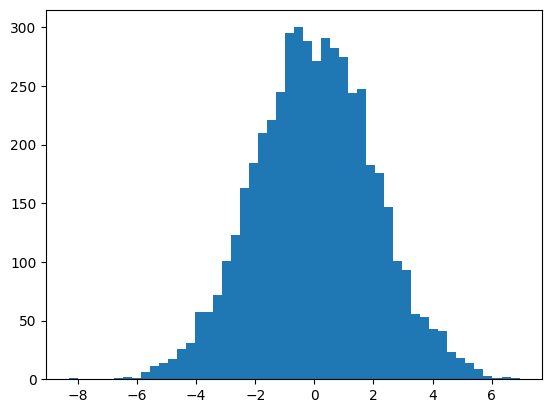

In [47]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50);

In [ ]:
# Mean
mean_manual = x.sum() / len(x)
mean_np = np.mean(x)
# Equality tolerant of floating-point quirks
print(mean_manual, mean_np)
np.allclose(mean_manual, mean_np)

-0.09171067535046756 -0.09171067535046756


True

In [ ]:
# Weighted mean
w1 = np.ones(len(x))
# or: w1 = np.ones_like(x)
w2 = np.array(range(len(x)))
print(
    np.average(x, weights=w1),
    np.average(x, weights=w2)
)

-0.09171067535046756 -0.1270947408657277


In [ ]:
# Variance and standard deviation, population and sample

var_np = np.var(x)              # population variance (ddof=0)
var_sample = np.var(x, ddof=1)  # sample variance (n-1)

std_np = np.std(x)
std_sample = np.std(x, ddof=1)

print(var_np, var_sample)
print(std_np, std_sample)

3.195829966168812 3.2610509858865426
1.7876884421422017 1.8058380286965225


In [ ]:
y = np.random.normal(0, 2, 50)

In [ ]:
# Covariance -- returned as a matrix
# ddof=1 by default!
cov_xy = np.cov(x, y, ddof=0)
print(cov_xy)

[[3.19582997 0.64612112]
 [0.64612112 4.22928485]]


In [ ]:
# Pearson correlation
# Elementwise division --- elementwise multiplication, addition and subtraction
# work in the same way.
corr_manual = cov_xy / np.array(
    [
        [x.std()**2, x.std()*y.std()],
        [x.std()*y.std(), y.std()**2]
    ]
)
print(corr_manual)

[[1.         0.17574729]
 [0.17574729 1.        ]]


In [ ]:
np.corrcoef(x, y)

array([[1.        , 0.17574729],
       [0.17574729, 1.        ]])

In [ ]:
# How do I get Spearman correlation coefficient?
from scipy.stats import spearmanr
# Returns a named tuple
spearmanr(x, y)

SignificanceResult(statistic=np.float64(0.20278511404561822), pvalue=np.float64(0.15784334162852426))

In [51]:
x = np.random.normal(0, 2, 50)
y = np.random.normal(0, 2, 50)
print(x)
print(y)

[-0.51964917  1.39669682  0.45726256  2.00883956  3.08443586 -0.22665198
  1.29380443  2.13603009  0.82060142  1.02027006  0.2867849   0.5108466
  1.04373543 -1.21557184 -3.39677727 -0.1754265  -0.33830973  3.2402143
  0.59235138  1.12404763 -0.82311942 -1.19174523 -1.6692806  -2.52042217
  1.45285891  0.61326152  2.95452221  1.09943451  0.48575165 -3.96274505
  3.81661963  0.07832835 -4.16762523  0.45157037 -1.62180107 -1.69319739
  0.53300635 -1.17494537  2.05337753 -0.2309261   0.79980341  1.13317741
  0.50366954  0.42864623  0.28326606  2.98700658  1.6877891  -1.38163754
 -2.22300562 -1.58802553]
[ 0.85562912 -2.20877427 -1.30559356 -2.68603854  1.86316483  1.32566385
  1.75732554 -0.9495878  -3.51754336 -1.66970848 -2.69451106 -2.71556328
  2.27388274 -0.4937506   0.57869081  2.20634895 -2.03906583  1.2284894
 -2.90508025  0.50498144  2.13526405 -2.27863789  1.65710804  0.44970297
 -0.90866412 -2.40094909  0.48361132  0.98768031 -0.63486615 -1.96200193
  1.52492771  2.36909421  1.

A very common operation &mdash; Euclidean distance:

$$
d(\mathbf{x},\mathbf{y}) = \sqrt{\sum_i(x_i - y_i)^2}
$$

In [ ]:
# Exercise: implement it using np.sqrt and other operations.

In [55]:
differences = x-y
squared_differences = np.square(differences)
sum_squared_differences = np.sqrt(np.sum(squared_differences))

euclidean_distances = np.sqrt(np.sum(np.square(x-y)))
print(sum_squared_differences)
print(euclidean_distances)



20.222947561144966
20.222947561144966


In [ ]:
# A shortcut: np.linalg.norm

Another important measure:

$$
\operatorname{cos\_sim}(\mathbf{x},\mathbf{y})
= \frac{\mathbf{x} \cdot \mathbf{y}}
{\|\mathbf{x}\|_2 \, \|\mathbf{y}\|_2} =
\frac{\sum_{i=1}^n x_i y_i}
{\sqrt{\sum_{i=1}^n x_i^2}\;
 \sqrt{\sum_{i=1}^n y_i^2}}
$$

In [64]:
# TODO: implement it using numpy
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(x, y)/(norm(x)*norm(y))

cos_sim_1 = (np.dot(x,y))/(np.sqrt(np.sum(np.square(x)))*np.sqrt(np.sum(np.square(y))))
# cos_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
# cos_sim_1 = np.dot(x, y) / (
#     np.sqrt(np.sum(np.square(x))) * np.sqrt(np.sum(np.square(y)))
# )

cos_sim_1

np.float64(-0.014759676825748544)

In [ ]:
# NB: very often people use cosine dissimilarity = 1 - cos_sim(x, y).
# It has some undesirable properties; better to use the angles theselves:
# np.acos(cos_sim(x, y))

## More general data processing with pandas

In [65]:
import pandas as pd

In [66]:
# Series and data frames
s_x = pd.Series(x)

In [67]:
s_x.describe()

,0
count,50.000000
mean,0.205143
std,1.780546
min,-4.167625
25%,-1.086989
50%,0.471507
75%,1.130895
max,3.816620


In [68]:
df_x_y = pd.DataFrame({
    'x': x,
    'y': y
})

In [69]:
df_x_y.describe()

,x,y
count,50.000000,50.000000
mean,0.205143,0.001455
std,1.780546,2.239307
min,-4.167625,-3.834298
25%,-1.086989,-1.953422
50%,0.471507,0.101588
75%,1.130895,1.481100
max,3.816620,6.903717


In [70]:
from sklearn import datasets

In [71]:
iris_bunch = datasets.load_iris(as_frame=True)
iris_X = iris_bunch.data
iris_y = iris_bunch.target
print(iris_bunch.target_names)

['setosa' 'versicolor' 'virginica']


In [72]:
iris_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
iris_numpy = iris_X.values

In [77]:
iris_numpy[:5, :5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [78]:
iris_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [79]:
# Is the dataset balanced?
iris_y.value_counts()

,count
target,
0,50
1,50
2,50


In [80]:
idx_to_name = {
    idx: iris_bunch.target_names[idx]
    for idx in range(len(iris_bunch.target_names))
}

In [81]:
# Using dict as a mapping -- allowed by pandas
iris_df = iris_X
iris_df['target'] = iris_y
iris_df.target = iris_df.target.map(idx_to_name)

In [82]:
iris_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
# Basically like SQL
iris_df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [85]:
# pandas indexing
# 1. By column name
iris_df[['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# For single columns, we can use the dot notation if there are no spaces
# iris_df.target == iris_df['target']
# However, we cannot use the dot notation to create a new column.

In [86]:
# 2. By index --- can be anything, but should have unique value for each row
my_index = [f'row{r+1:>03}' for r in range(iris_df.shape[0])]

In [87]:
my_index[:5]

['row001', 'row002', 'row003', 'row004', 'row005']

In [88]:
iris_df.index

RangeIndex(start=0, stop=150, step=1)

In [89]:
iris_df.index = my_index

In [90]:
iris_df.loc['row123']

,row123
sepal length (cm),7.7
sepal width (cm),2.8
petal length (cm),6.7
petal width (cm),2.0
target,virginica


In [91]:
# 3. Using a True/False vector
iris_df.loc[iris_df.target == 'versicolor'][:5]
# Same as iris_df[iris_df.target == 'versicolor'][:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
row051,7.0,3.2,4.7,1.4,versicolor
row052,6.4,3.2,4.5,1.5,versicolor
row053,6.9,3.1,4.9,1.5,versicolor
row054,5.5,2.3,4.0,1.3,versicolor
row055,6.5,2.8,4.6,1.5,versicolor


In [ ]:
# 4. Using raw indices
iris_df.iloc[:5, -3:]

,petal length (cm),petal width (cm),target
row001,1.4,0.2,setosa
row002,1.4,0.2,setosa
row003,1.3,0.2,setosa
row004,1.5,0.2,setosa
row005,1.4,0.2,setosa


In [103]:
# Random sampling
iris_sample = iris_df.sample(10, random_state=1)

In [104]:
iris_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
row015,5.8,4.0,1.2,0.2,setosa
row099,5.1,2.5,3.0,1.1,versicolor
row076,6.6,3.0,4.4,1.4,versicolor
row017,5.4,3.9,1.3,0.4,setosa
row132,7.9,3.8,6.4,2.0,virginica
row057,6.3,3.3,4.7,1.6,versicolor
row142,6.9,3.1,5.1,2.3,virginica
row045,5.1,3.8,1.9,0.4,setosa
row030,4.7,3.2,1.6,0.2,setosa
row121,6.9,3.2,5.7,2.3,virginica


### Let's go through the usual steps in building a machine-learning model, using the Iris dataset and kNN as an example.

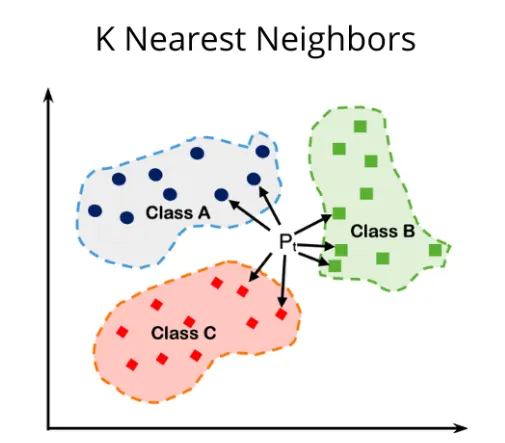

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.dummy import DummyClassifier

In [ ]:
# Starting from scratch
iris = load_iris()
X = iris.data
y = iris.target

print("Data shape:", X.shape)
print("Targets:", np.unique(y))

Data shape: (150, 4)
Targets: [0 1 2]


Normally we need 3 splits: train, dev (to decide on hyperparameters and monitor training), and test.

In [ ]:
# First split off the test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    # Stratified sampling to ensure class balance between splits
    stratify=y
)

# Split remainder into train and dev/validation set
X_train, X_dev, y_train, y_dev = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# (0.25 of 0.8 = 0.2 → train=60%, dev=20%, test=20%)

In [ ]:
# What is called z-scoring
scaler = StandardScaler()

# Fit on training data only, otherwise there will be a subtle influence of the
# test data on the training data.
scaler.fit(X_train)

# Transform train/dev/test
X_train_scaled = scaler.transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# TODO: do this in numpy

In [ ]:
# The majority-class baseline. Since the dataset is perfectly balanced, it is
# also the random baseline. For an imbalanced dataset, the majority baseline is
# stronger.
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_dev)
print("Baseline accuracy on dev:", accuracy_score(y_dev, baseline_pred))

Baseline accuracy on dev: 0.3333333333333333


In [ ]:
# How many nearest neighbours should we take into account?
# With a binary classifier, avoid even k's. With more than 2 classes, it is
# harder to be principled. The most important thing is to use the same
# tie-breaking strategy in training and testing. Random tie-breaking is
# less biased but increases variance and hurts reproducibility. With a decent
# dataset, it should not matter.
k_values = range(1, 21)
dev_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_dev_scaled)
    acc = accuracy_score(y_dev, preds)
    dev_accuracies.append(acc)

best_k = k_values[int(np.argmax(dev_accuracies))]
print("Best k:", best_k)


Best k: 2


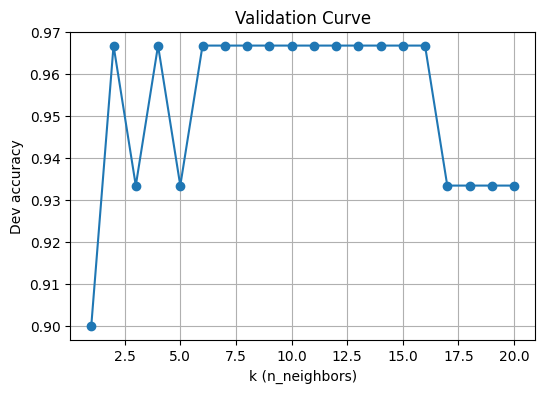

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(k_values, dev_accuracies, marker='o')
plt.xlabel("k (n_neighbors)")
plt.ylabel("Dev accuracy")
plt.title("Validation Curve")
plt.grid(True)
plt.show()


In [ ]:
# An alternative strategy: repeatedly split the non-test-set into train and dev.
# Provides a bigger effective dev set and better statistical robustness.
# Does not work with large models, which we usually cannot afford to train more
# than once per a combination of hyperparameter values.


best_k_cv = 0
best_k_cv_acc = float('-inf')
for k in k_values:
    # What is wrong with this code?
    cv_scores = cross_val_score(
        KNeighborsClassifier(n_neighbors=k),
        scaler.transform(X_temp), y_temp, cv=5
    )
    mean_acc = cv_scores.mean()
    if mean_acc > best_k_cv_acc:
        best_k_cv_acc = mean_acc
        best_k_cv = k
    cv_score_std = cv_scores.std().round(3)
    print(f'k = {k:>2}, mean acc.: {mean_acc.round(3):>6}, acc. std.: {cv_score_std}')
print(f'\nBest k: {best_k_cv}')

k =  1, mean acc.:  0.942, acc. std.: 0.042
k =  2, mean acc.:  0.958, acc. std.: 0.037
k =  3, mean acc.:  0.958, acc. std.: 0.037
k =  4, mean acc.:  0.958, acc. std.: 0.037
k =  5, mean acc.:  0.958, acc. std.: 0.037
k =  6, mean acc.:  0.958, acc. std.: 0.037
k =  7, mean acc.:   0.95, acc. std.: 0.031
k =  8, mean acc.:  0.958, acc. std.: 0.037
k =  9, mean acc.:  0.967, acc. std.: 0.031
k = 10, mean acc.:  0.967, acc. std.: 0.031
k = 11, mean acc.:   0.95, acc. std.: 0.041
k = 12, mean acc.:  0.967, acc. std.: 0.031
k = 13, mean acc.:   0.95, acc. std.: 0.041
k = 14, mean acc.:  0.975, acc. std.: 0.033
k = 15, mean acc.:  0.958, acc. std.: 0.026
k = 16, mean acc.:  0.958, acc. std.: 0.026
k = 17, mean acc.:  0.958, acc. std.: 0.026
k = 18, mean acc.:  0.942, acc. std.: 0.02
k = 19, mean acc.:  0.942, acc. std.: 0.02
k = 20, mean acc.:  0.933, acc. std.: 0.033

Best k: 14


In [ ]:
# Combine train + dev for final training
X_final = np.vstack([X_train_scaled, X_dev_scaled])
y_final = np.hstack([y_train, y_dev])

final_model = KNeighborsClassifier(n_neighbors=best_k)  # or best_k_cv
final_model.fit(X_final, y_final)

test_preds = final_model.predict(scaler.transform(X_test))

# It is tempting to try both best_k and best_k_cv, but this is cheating.

In [ ]:
print("Test accuracy:", accuracy_score(y_test, test_preds))
print("Test precision (macro):", precision_score(y_test, test_preds, average='macro'))
print("Test recall (macro):", recall_score(y_test, test_preds, average='macro'))
print("Test F1 (macro):", f1_score(y_test, test_preds, average='macro'))

print("\nClassification report:")
print(classification_report(y_test, test_preds, target_names=iris.target_names))

Test accuracy: 0.9333333333333333
Test precision (macro): 0.9444444444444445
Test recall (macro): 0.9333333333333332
Test F1 (macro): 0.9326599326599326

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



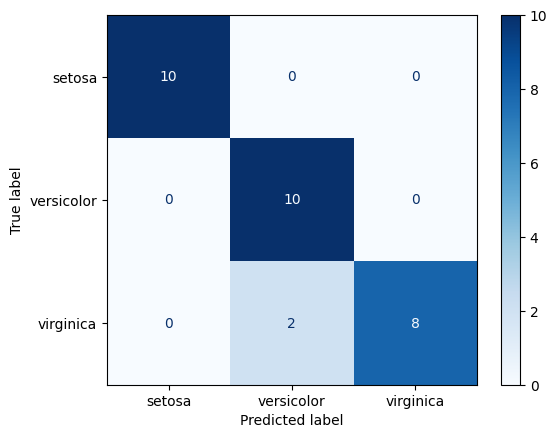

In [ ]:
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.show()